# Confusion Matrix #

Exploring what a confusion matrix is and implementing it in python

### What is it?

A mtrix that summarises the performance of a classificationn model on a set of test data.
A matrix is used to display the number of instnaces produced by the model on the test data and categorising it as follows:

Actual values {True, False}
Predicted values {Postive, Negative}

**Here, "False" means the model is wrong, and "True" means it was right**

- True Positive (TP): Model correclty predicted an outcome as positive (Predicted a pregnanat woman is pregnant)
- True Negative (TN): Model correclty predicted an outcome as negative (Predicted a man to not be pregnant)
- False Positive (FP): Model incorrectly predicted an outcome to be positive, when it is not (Predicted a man to be pregnant)
- Fasle Negative (FN): Model incorrectly predicts an outcome as negative. when it is not (Predicted a woman to not be pregnant when she actually is)

### Why do we need it?

Helps us to see where our model went wrong, it's much better to get a false alarm (False Positive) than to get a missed problem (False Negative). 

- For example, in a medical scenario it's much better to get a false alarm (saying you hav cancer when you actually don't, False Positive) than to get a missed diagnosis (saying you don't have cancer when you actually do, False Negative)

### Key performance metrics

**Accuracy**: How often is the model correct overall?

- (TP + TN) / (TN + TP + FN + FP)
- Out of all the pregnacy tests, how many were correctly classified?

**Precision:** When the model says 'yes', how often is it right?

- TP / (TP + FP)
- When the test says 'pregnant', how often is it true?

**Recall(Sensitivity):** How well does it catch actuall positives?

- TP / (TP + FN)
- Out of all pregnant people, how many did we correclty identify?

**Specificity:** How well does it identify actual negatives?

- TN / (TN + FP)
- Out of all the non-pregnant people, how many did we correctly identify?

**F1-score:** Used to evaluate the overall performance of a classification model

- 2 * Precision * Recall / Precision + Recall

### Type 1 and Type 2 Errors

**Type 1:** When a model identifies data as positive when it is actually negative

**Type 2:** When a model identifies data as negative when it is actually positive

# Creating a Confusion Matrix

In [35]:
import numpy

In [57]:
actual = numpy.random.binomial(1,0.9, size = 1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000) # simulating a models prediction

In [41]:
from sklearn import metrics # used to create confusion matrix

In [45]:
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [47]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1])

In [49]:
import matplotlib.pyplot as plt

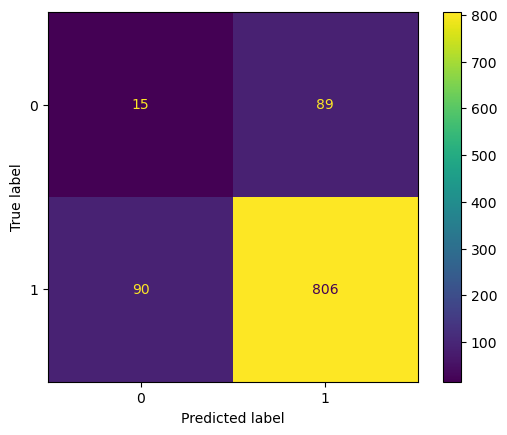

In [51]:
cm_display.plot()
plt.show()

### So what is going on above?

- We are creating 2 arrays of 1000 values, where each value is either a 0 or a 1
- Each value within both arrays is compared by comparing them index wise, so:

In [61]:
a = [1,0,1,1,0] # actual
p = [1,0,0,0,1] # predicted
#    ✓ ✓ ✗ ✗ ✗ where ✗ = incorrect predition, ✓ = correct prediction

- The sklearn library does all that counting for us as we have a 1000 numbers to get through

### Results explained

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)

# Metrics

### Accruacy
How often the model is correct

In [83]:
# TP + TN / TP + TN + FP + FN
# 821 / 1000
accuracy = metrics.accuracy_score(actual, predicted)

### Precision

- Of all predicited positives, what percentage is truly positive?
- Does not evaluate the correclty predicted negative cases

In [93]:
# TP / (TP + FN)
precision = metrics.precision_score(actual, predicted)
precision

0.907182320441989

#### Recall (Sensitivity)

- Of all positive cases, what perecentage are predicted as positives?
- Measures how good the model is at predicting positives
- Looking at true positives and false negatives (positives labbeled to be negatives incorrectly)

In [100]:
# TP / (TP + FN)
recall = metrics.recall_score(actual, predicted)
recall

0.9041850220264317

### Specificity

- How well the model is at predicting negatives
- Just the opposite of recall


In [107]:
# TN / (TN + FP)
specificity = metrics.recall_score(actual, predicted, pos_label=0)
specificity

0.08695652173913043

### F-Score

- "Harmonic mean" of precision of sensitivity
- Considers both false positives and false negatives and it is good for imbalanced datasets


In [116]:
f1_score = metrics.f1_score(actual, predicted)
f1_score

0.9056811913954771

In [120]:
print({"Accuracy":accuracy,"Precision":precision,"Sensitivity_recall":recall,"Specificity":specificity,"F1_score":f1_score})


{'Accuracy': 0.829, 'Precision': 0.907182320441989, 'Sensitivity_recall': 0.9041850220264317, 'Specificity': 0.08695652173913043, 'F1_score': 0.9056811913954771}
